# Importação de Bibliotecas e Dados

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

import warnings

warnings.filterwarnings("ignore")

In [2]:
def data_import():
    """
    Função para importar os dados.
    """
    return pd.read_csv("./Dados/esg_empresas/data.csv")

# Tratamento 

In [3]:
df = data_import()
df.head(2)

,ticker,name,currency,exchange,industry,logo,weburl,environment_grade,environment_level,social_grade,...,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level,cik
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,https://static.finnhub.io/logo/ef50b4a2b263c84...,https://thewaltdisneycompany.com/,A,High,BB,...,BB,Medium,510,316,321,1147,19-04-2022,BBB,High,1744489
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,https://static.finnhub.io/logo/9253db78-80c9-1...,https://www.gm.com/,A,High,BB,...,B,Medium,510,303,255,1068,17-04-2022,BBB,High,1467858


In [4]:
# Olhar se há dados faltantes e os tiposd e dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ticker                722 non-null    object
 1   name                  722 non-null    object
 2   currency              722 non-null    object
 3   exchange              722 non-null    object
 4   industry              709 non-null    object
 5   logo                  702 non-null    object
 6   weburl                706 non-null    object
 7   environment_grade     722 non-null    object
 8   environment_level     722 non-null    object
 9   social_grade          722 non-null    object
 10  social_level          722 non-null    object
 11  governance_grade      722 non-null    object
 12  governance_level      722 non-null    object
 13  environment_score     722 non-null    int64 
 14  social_score          722 non-null    int64 
 15  governance_score      722 non-null    in

In [5]:
# Dados da indústria estão faltando, antes de realizar qualquer tipo de tratamento devemos averiguar as classes de indústria. 
df["industry"].value_counts()

industry
Technology                            63
Biotechnology                         56
Health Care                           51
Real Estate                           36
Financial Services                    33
Utilities                             30
Banking                               29
Electrical Equipment                  27
Insurance                             27
Retail                                26
Semiconductors                        24
Media                                 23
Hotels Restaurants and Leisure        22
Machinery                             21
Pharmaceuticals                       21
Consumer products                     20
Energy                                19
Chemicals                             19
Life Sciences Tools and Services      16
Food Products                         14
Aerospace and Defense                 10
Building                              10
Textiles Apparel and Luxury Goods      9
Metals and Mining                      9
Communi

In [6]:
# Selecionando os tickers para saber qual setor essas empresas pertencem.
tickers = df.loc[df["industry"].isnull(),"ticker"].to_list()
tickers

['aaci',
 'acac',
 'acev',
 'adoc',
 'afaq',
 'aib',
 'akic',
 'alhc',
 'haac',
 'hcar',
 'pre',
 'pow',
 'cnd']

In [7]:
# Acima está listado os tickers das ações que estão com informações faltantes sobre os setores, uma rápida pesquisa na internet
# permite preencher esse dados faltantes.
setores = ["Financial Services ","Diversified Consumer Services","Financial Services","Pharmaceuticals","Financial Services", "Financial Services",
 "Consumer products", "Health Care", "Health Care","Health Care","Financial Services","Financial Services","Energy"
]
setores

['Financial Services ',
 'Diversified Consumer Services',
 'Financial Services',
 'Pharmaceuticals',
 'Financial Services',
 'Financial Services',
 'Consumer products',
 'Health Care',
 'Health Care',
 'Health Care',
 'Financial Services',
 'Financial Services',
 'Energy']

In [8]:
# Um loop para o preenchimento dos dados vazios.
for i,z in zip(tickers,setores):
    df.loc[df["ticker"] == i, "industry"] = z
    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ticker                722 non-null    object
 1   name                  722 non-null    object
 2   currency              722 non-null    object
 3   exchange              722 non-null    object
 4   industry              722 non-null    object
 5   logo                  702 non-null    object
 6   weburl                706 non-null    object
 7   environment_grade     722 non-null    object
 8   environment_level     722 non-null    object
 9   social_grade          722 non-null    object
 10  social_level          722 non-null    object
 11  governance_grade      722 non-null    object
 12  governance_level      722 non-null    object
 13  environment_score     722 non-null    int64 
 14  social_score          722 non-null    int64 
 15  governance_score      722 non-null    in

In [10]:
# Deletar informações que não serão mais úteis.
df = df.drop(["weburl","logo","cik"], axis=1)

In [11]:
df.head(3)

,ticker,name,currency,exchange,industry,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,A,High,BB,Medium,BB,Medium,510,316,321,1147,19-04-2022,BBB,High
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,A,High,BB,Medium,B,Medium,510,303,255,1068,17-04-2022,BBB,High
2,gww,WW Grainger Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Trading Companies and Distributors,B,Medium,BB,Medium,B,Medium,255,385,240,880,19-04-2022,BB,Medium


In [12]:
# Verificar duplicatas
df.duplicated().sum()

0

# Análise Exploratória
* Como o primeiro contato com os dados é nesse momento, será realizado um estudo usando estatística descritiva e referêncial para melhor compreensão dos dados presentes e seu comportamento.

## Análise Gráfica 

### Função

In [13]:
class AnaliseInferencial:
    def graf_ind(self, dados, titulo, tamanho):
        # Definir parâmetros do Matplotlib
        params = {
            'figure.figsize': tamanho,      # Definir o tamanho da figura (largura, altura) em polegadas
            'axes.titlesize': 16,           # Tamanho do título do gráfico
            'axes.labelsize': 14,           # Tamanho dos rótulos dos eixos
            'xtick.labelsize': 12,          # Tamanho dos rótulos dos ticks do eixo x
            'ytick.labelsize': 12,          # Tamanho dos rótulos dos ticks do eixo y
            'legend.fontsize': 12,          # Tamanho da fonte da legenda
            'lines.linewidth': 2,           # Largura das linhas do gráfico
            'lines.markersize': 6,          # Tamanho dos marcadores
            'axes.titlepad': 20             # Espaço entre o título e o gráfico
        }

        # Atualizar parâmetros do Matplotlib
        plt.rcParams.update(params)

        # Criar um gráfico de barras horizontal com Seaborn
        bar = sns.barplot(
            orient='h',                      # Orientação horizontal
            y=dados.value_counts().index,    # Eixo y: categorias (nomes dos setores)
            x=dados.value_counts().values,   # Eixo x: valores (contagem de cada setor)
            dodge=False                      # Não usar deslocamento para barras agrupadas
        )

        # Adicionar título ao gráfico
        plt.title(titulo)

        # Calcular a porcentagem de cada setor em relação ao total de dados
        a = ((dados.value_counts().values / dados.shape[0]) * 100).tolist()
        # Obter a contagem absoluta de cada setor
        b = dados.value_counts().values.tolist()
        # Formatar os rótulos com contagem e porcentagem
        c = [f'{bb} ({aa:.2f}%)' for aa, bb in zip(a, b)]

        # Inicializar contador para a posição y dos rótulos
        co = 0

        # Adicionar os rótulos de porcentagem às barras
        for val, pos in zip(c, dados.value_counts().values):
            bar.annotate(
                val,                        # Texto do rótulo
                xy=(pos / 2, co),           # Posição x e y do rótulo
                fontsize=10,                # Tamanho da fonte do rótulo
                color='black'               # Cor do rótulo
            )
            co += 1                        # Incrementar contador para a próxima posição y

        # Mostrar o gráfico
        return plt.show()

    def graf_grup(self, bar1, bar2, histo,titulo):
        
        # Definir parâmetros do Matplotlib
        params = {
            'figure.figsize': [12,15],      # Definir o tamanho da figura (largura, altura) em polegadas
            'axes.titlesize': 16,           # Tamanho do título do gráfico
            'axes.labelsize': 14,           # Tamanho dos rótulos dos eixos
            'xtick.labelsize': 12,          # Tamanho dos rótulos dos ticks do eixo x
            'ytick.labelsize': 12,          # Tamanho dos rótulos dos ticks do eixo y
            'legend.fontsize': 12,          # Tamanho da fonte da legenda
            'lines.linewidth': 2,           # Largura das linhas do gráfico
            'lines.markersize': 6,          # Tamanho dos marcadores
            'axes.titlepad': 20             # Espaço entre o título e o gráfico
        }

        # Atualizar parâmetros do Matplotlib
        plt.rcParams.update(params)
        tamanho = [3,2]
        plt.subplots_adjust(top=0.92,
                      wspace = 0.5,
                      hspace = 0.5)
        plt.suptitle(titulo,fontsize=20)
        # Distribuição Barras
        for c, dado in enumerate([bar1, bar2]):
            pos = (0,c)
            ax = plt.subplot2grid(tamanho, pos) # Axis
            barra = sns.barplot(
                orient="h",
                x = dado.value_counts().values,
                y = dado.value_counts().index,
                ax=ax
            )

                # Calcular a porcentagem de cada setor em relação ao total de dados
            a = ((dado.value_counts().values / dado.shape[0]) * 100).tolist()
            # Obter a contagem absoluta de cada setor
            b = dado.value_counts().values.tolist()
            # Formatar os rótulos com contagem e porcentagem
            c = [f'{bb} ({aa:.2f}%)' for aa, bb in zip(a, b)]
    
            # Inicializar contador para a posição y dos rótulos
            co = 0
    
            # Adicionar os rótulos de porcentagem às barras
            for val, pos in zip(c, dado.value_counts().values):
                barra.annotate(
                    val,                        # Texto do rótulo
                    xy=(pos / 2, co),           # Posição x e y do rótulo
                    fontsize=10,                # Tamanho da fonte do rótulo
                    color='black'               # Cor do rótulo
                )
                co += 1                        # Incrementar contador para a próxima posição y

        
            
        # Histograma.
        pos = (1,0)
        ax = plt.subplot2grid(tamanho, pos,colspan=2) # Axis
        histograma = sns.histplot(
            x = histo,
            ax=ax
        )

        # Gráfico de Caixa.
        pos = (2,0)
        ax = plt.subplot2grid(tamanho, pos,colspan=2) # Axis
        caixa = sns.boxplot(
            x = histo,
            ax=ax,width=.3
        )
        
        
    def graf_corr(self, dados, titulo):
        # Definir parâmetros do Matplotlib
        params = {
            'figure.figsize': [10,10],      # Definir o tamanho da figura (largura, altura) em polegadas
            'axes.titlesize': 16,           # Tamanho do título do gráfico
            'axes.labelsize': 14,           # Tamanho dos rótulos dos eixos
            'xtick.labelsize': 12,          # Tamanho dos rótulos dos ticks do eixo x
            'ytick.labelsize': 12,          # Tamanho dos rótulos dos ticks do eixo y
            'legend.fontsize': 12,          # Tamanho da fonte da legenda
            'lines.linewidth': 2,           # Largura das linhas do gráfico
            'lines.markersize': 6,          # Tamanho dos marcadores
            'axes.titlepad': 20             # Espaço entre o título e o gráfico
        }

        # Atualizar parâmetros do Matplotlib
        plt.rcParams.update(params)

        # Tratamento inicial
        data = dados.copy()
        categoricos = data.select_dtypes(exclude=np.number).columns
        for col in categoricos:
            data[col] =  LabelEncoder().fit_transform(data[col])
        plt.title(titulo)
        df_matrix = data.corr(method="pearson")
        filtro = 0.3
        df_matrix[(df_matrix < filtro) & (df_matrix > -(filtro))] = 0
        mask = np.triu(np.ones_like(df_matrix, dtype=bool))
        fig = sns.heatmap(df_matrix, mask=mask, annot=True, cbar=False, cmap="mako")
        #fig.set_xticklabels(fig.get_xticklabels(), rotation=45);
        return plt.show()



### Análise Inferencial.

* Industrias
* Moeda
* Mercado
* ESG

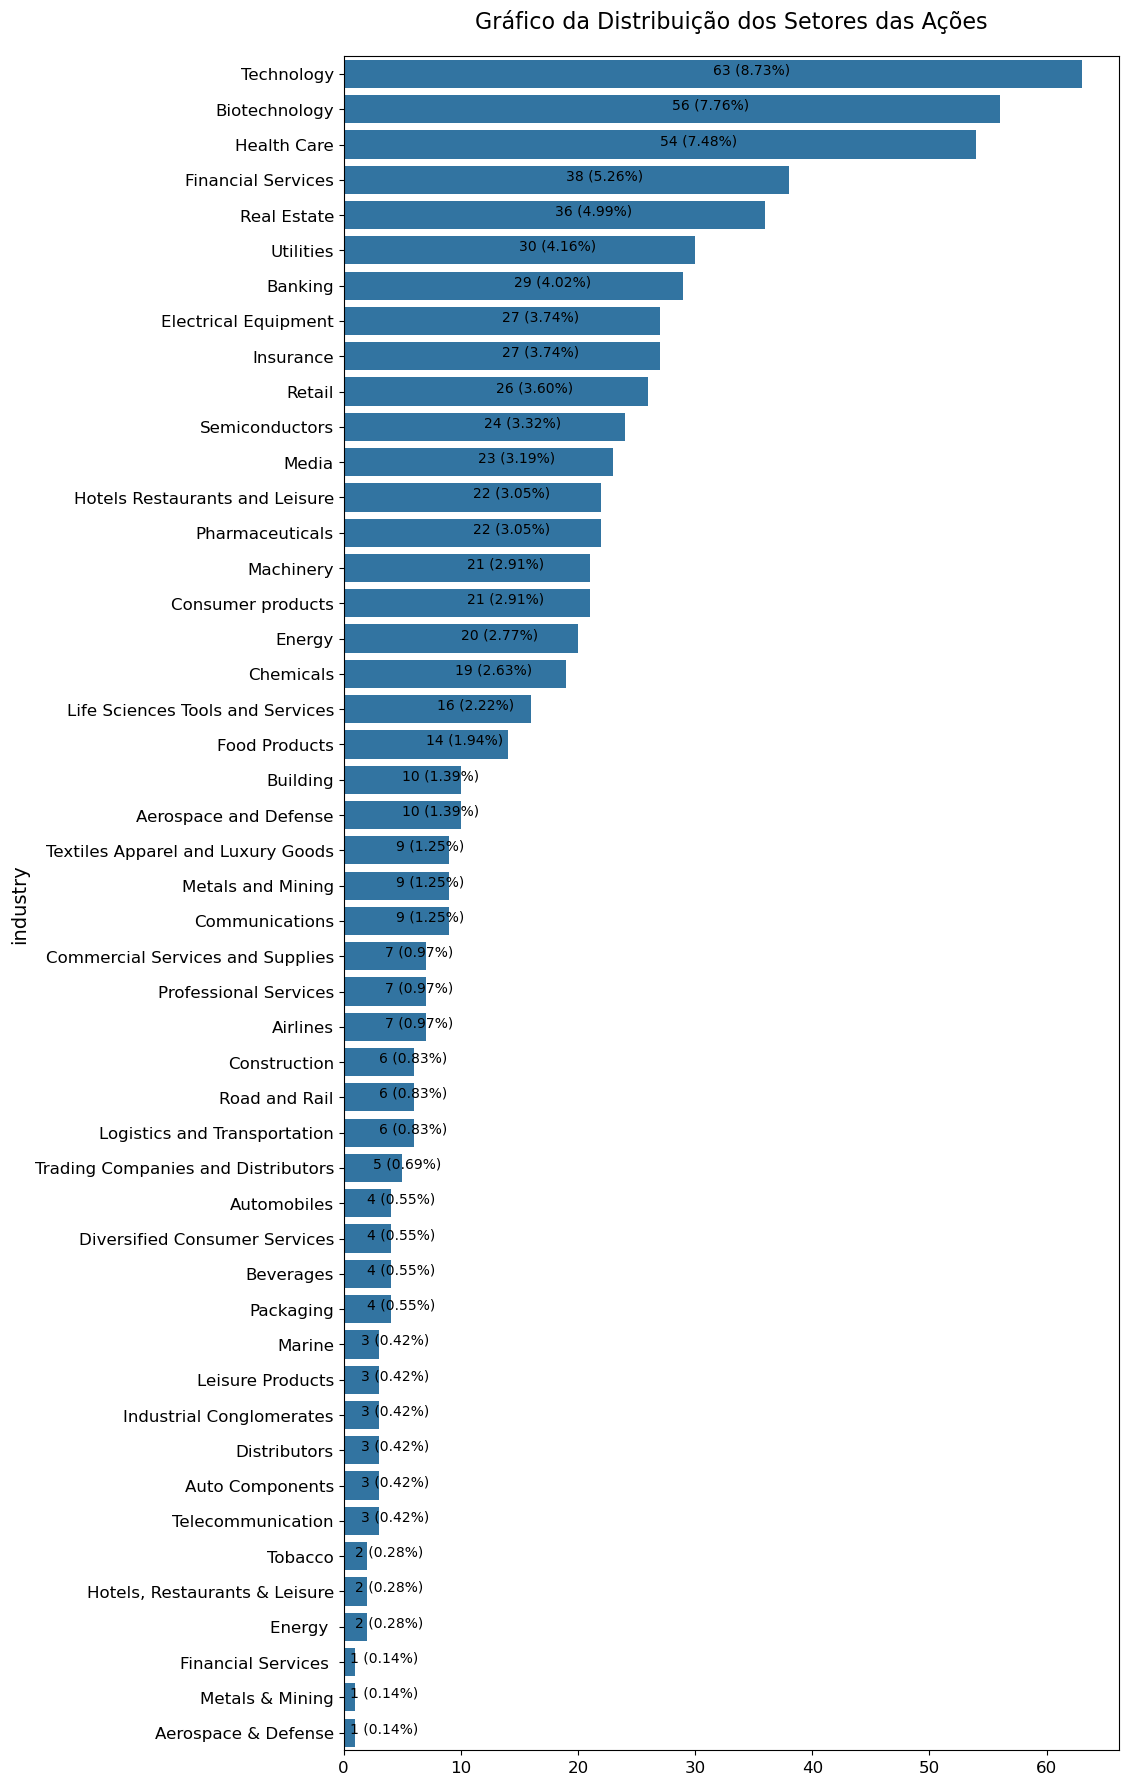

In [14]:
ai = AnaliseInferencial()
ai.graf_ind(df["industry"],"Gráfico da Distribuição dos Setores das Ações",[10,22])

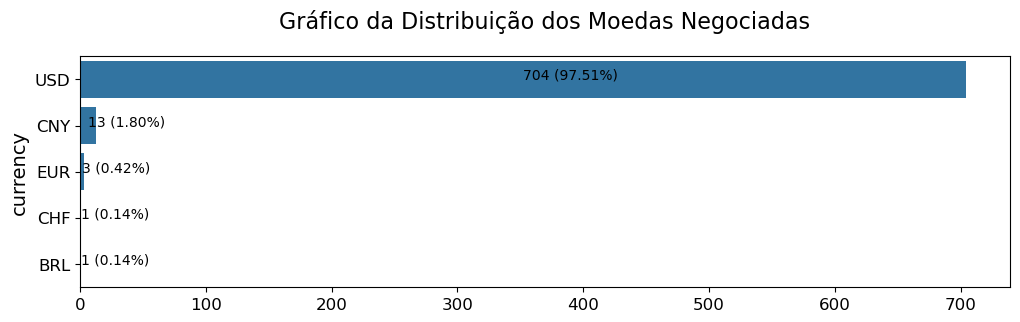

In [15]:
ai.graf_ind(df["currency"],"Gráfico da Distribuição dos Moedas Negociadas",[12,3])

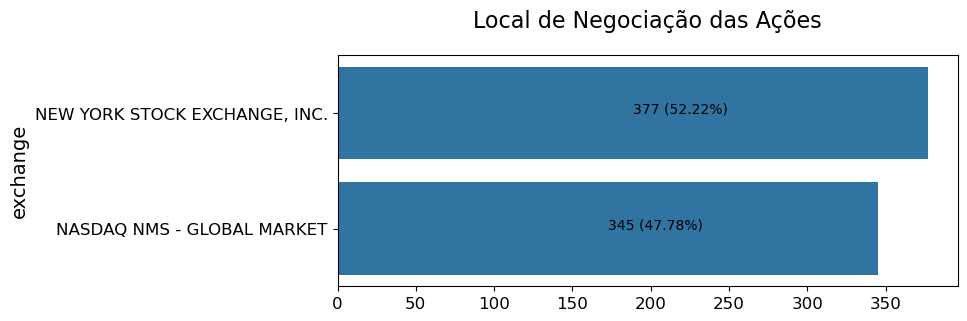

In [16]:
ai.graf_ind(df["exchange"],"Local de Negociação das Ações",[8,3])

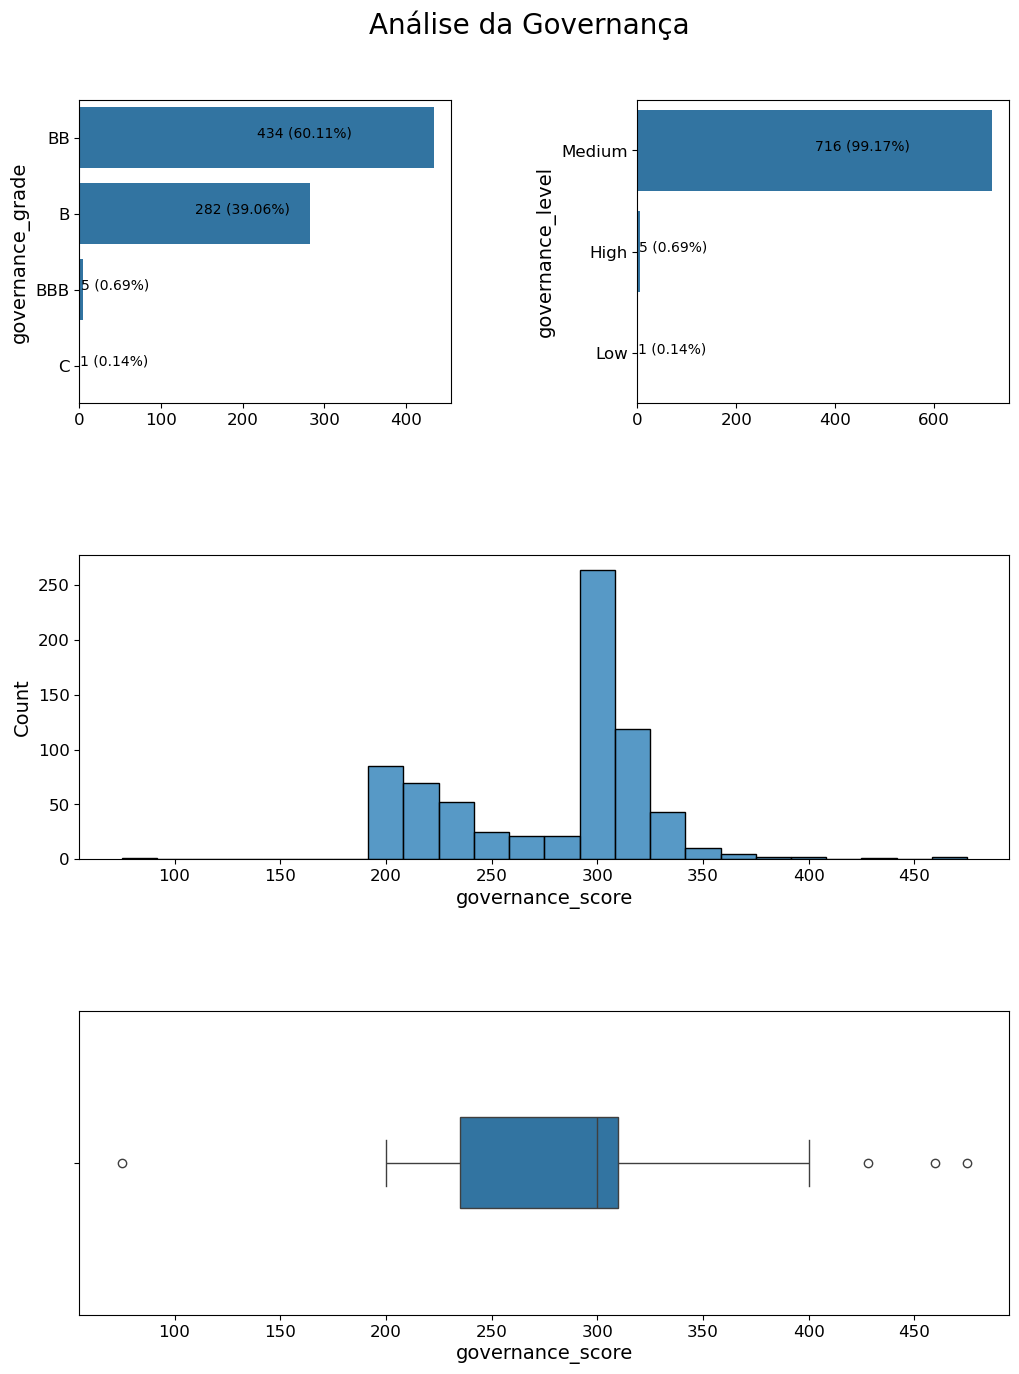

In [17]:
ai.graf_grup(df["governance_grade"],df["governance_level"],df["governance_score"],"Análise da Governança")

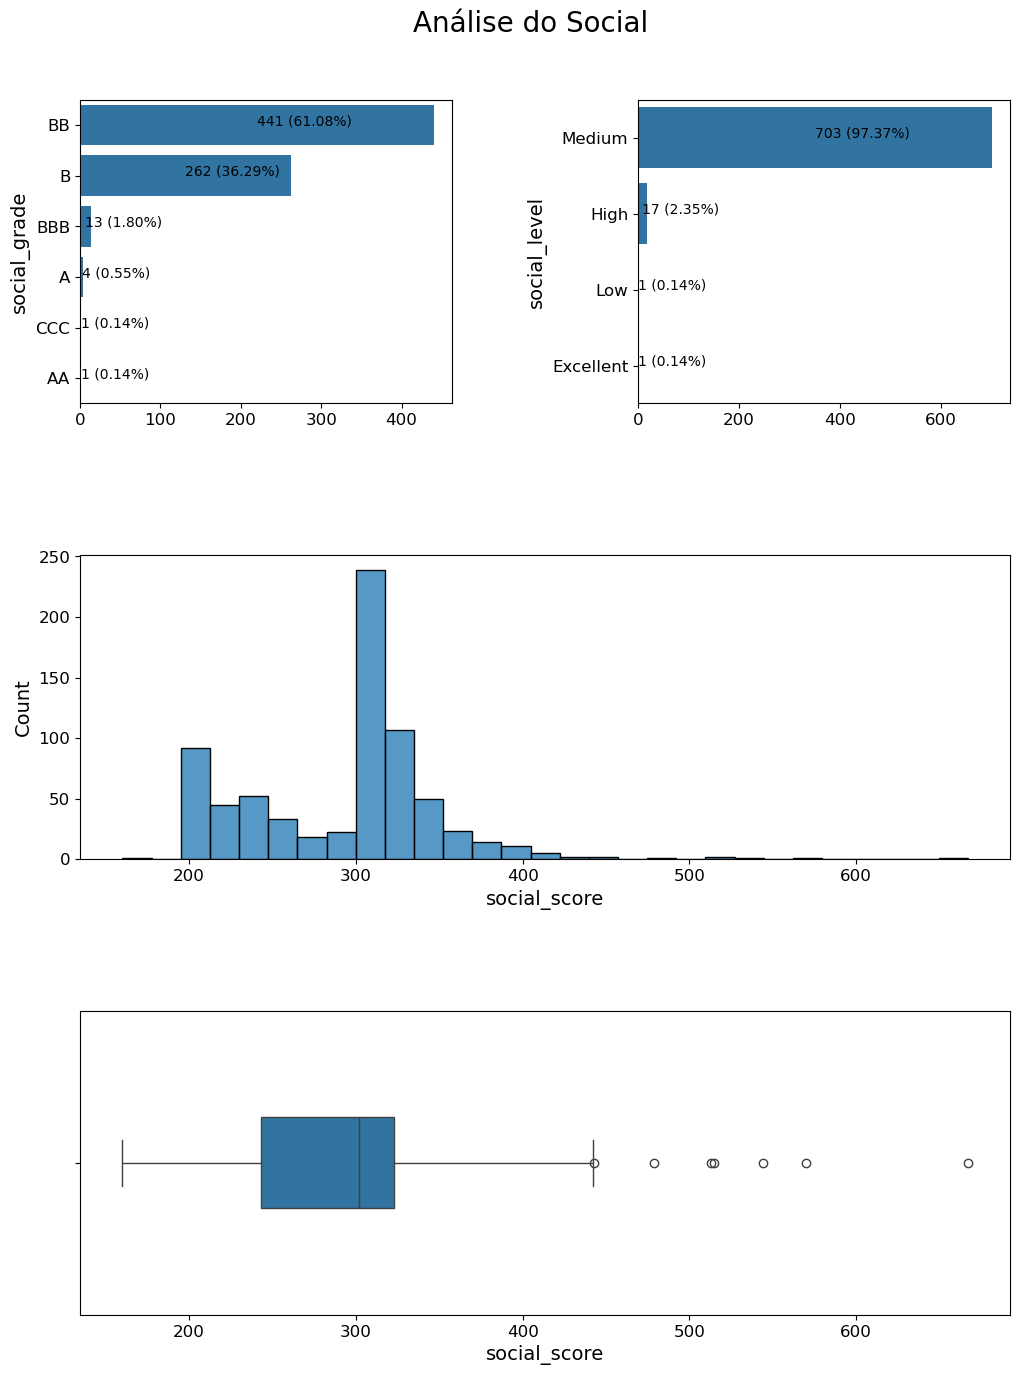

In [18]:
ai.graf_grup(df["social_grade"],df["social_level"],df["social_score"],"Análise do Social")

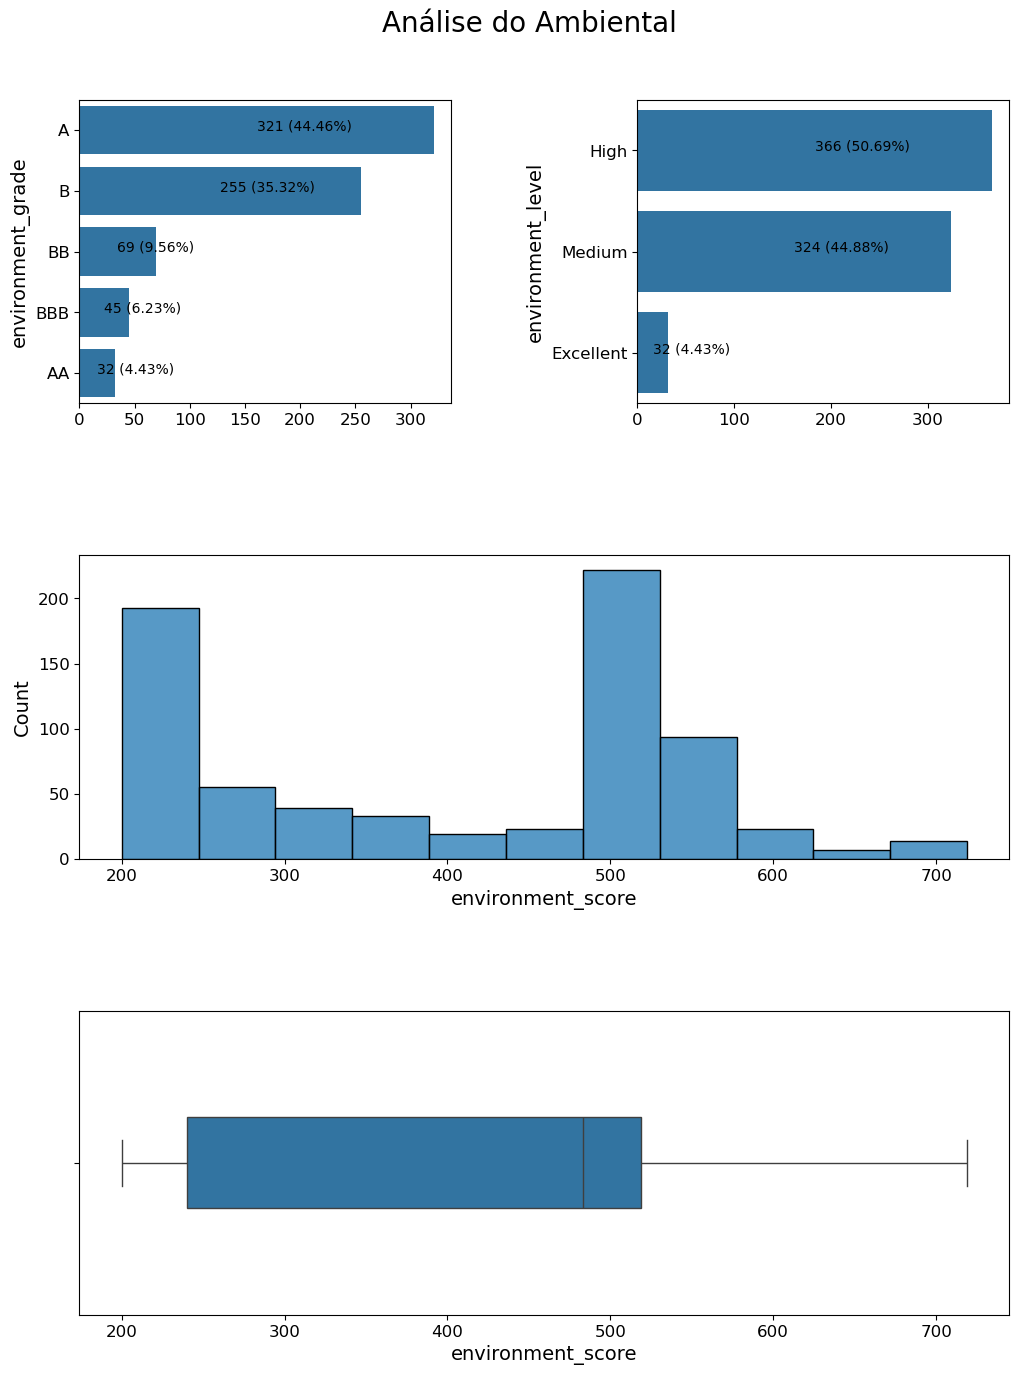

In [19]:
ai.graf_grup(df["environment_grade"],df["environment_level"],df["environment_score"],"Análise do Ambiental")

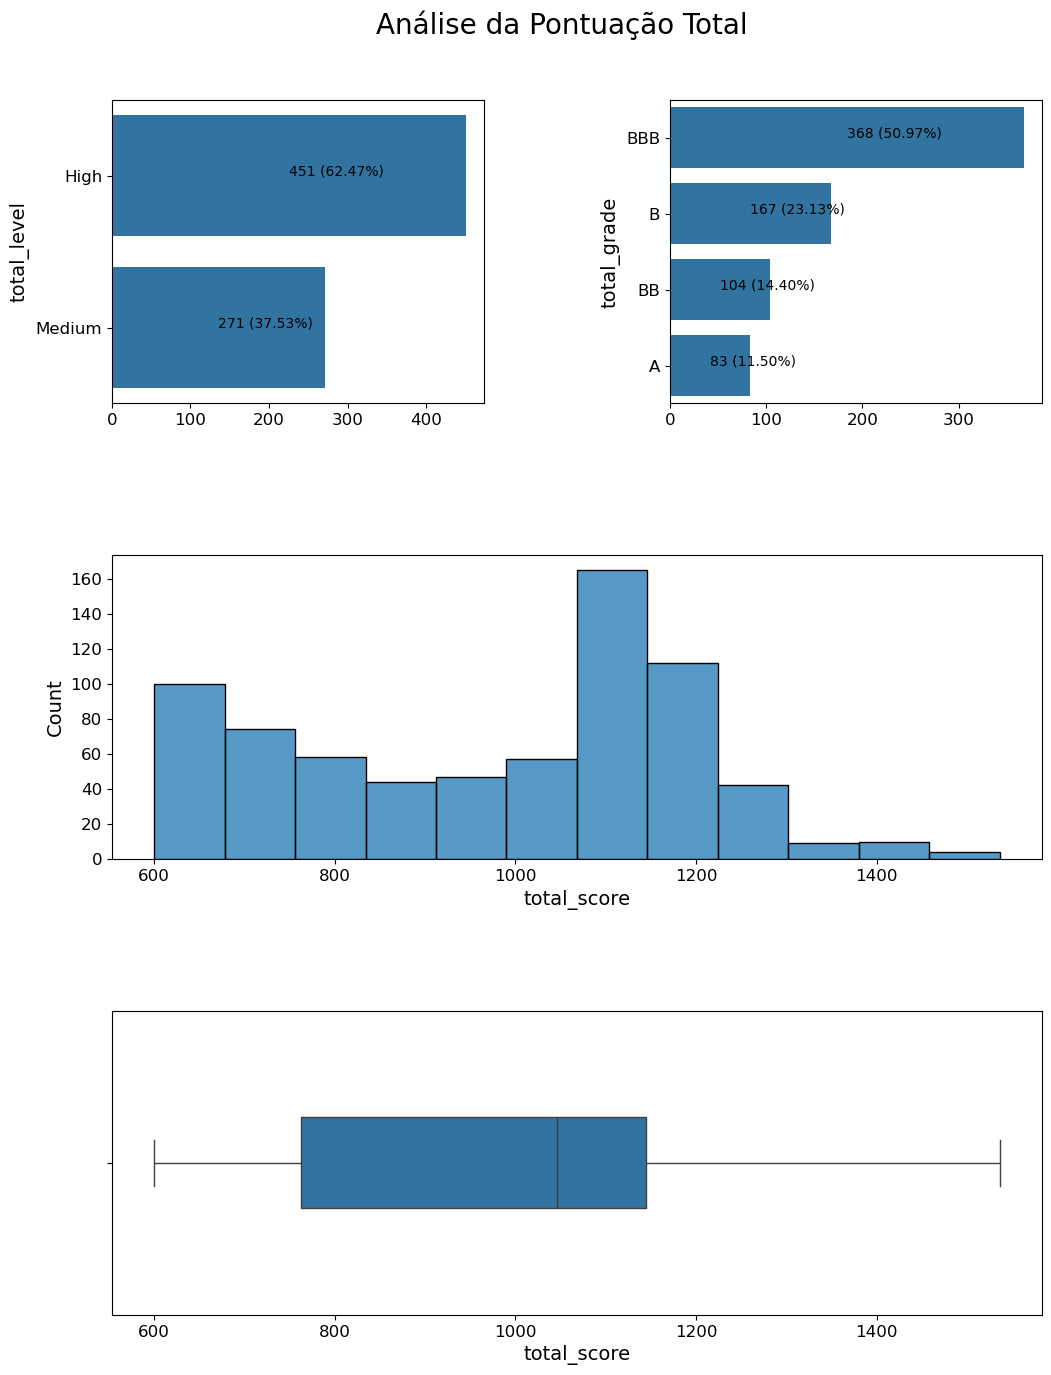

In [20]:
ai.graf_grup(df["total_level"],df["total_grade"],df["total_score"],"Análise da Pontuação Total")

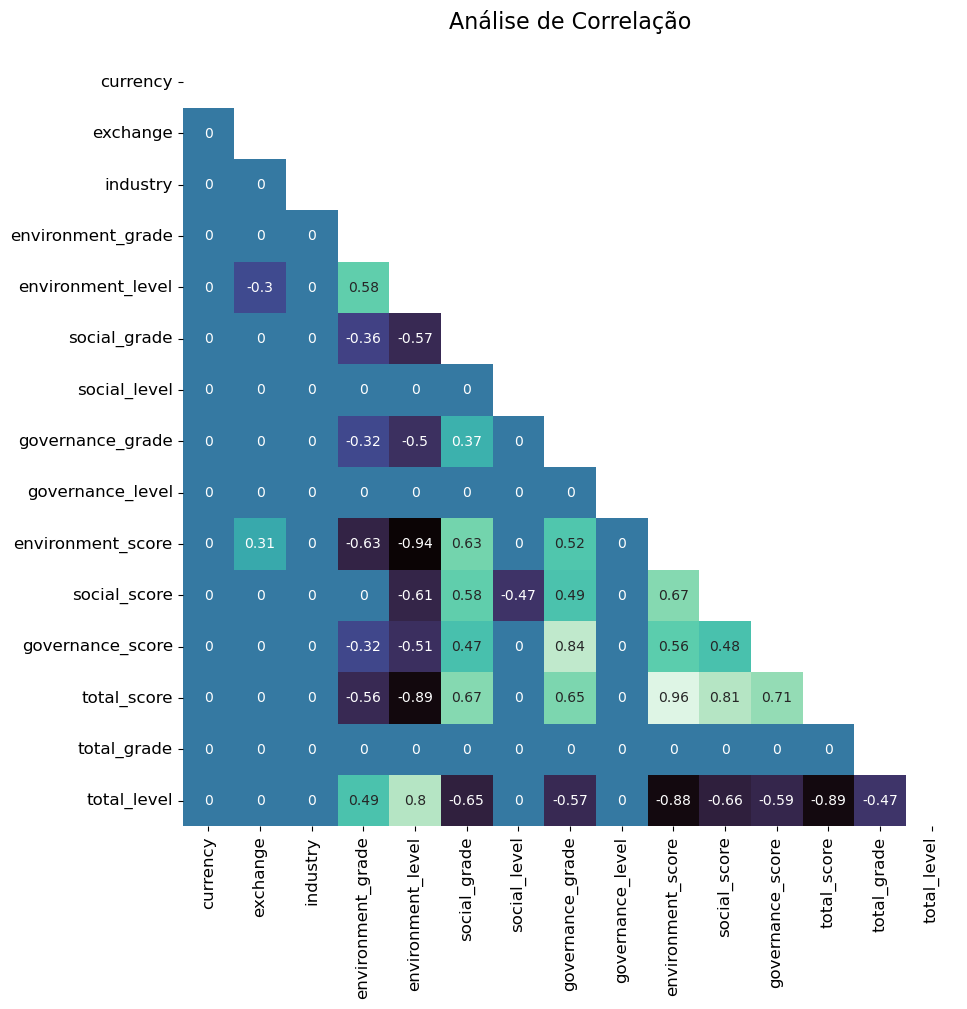

In [21]:
ai.graf_corr(df.drop(["ticker","name","last_processing_date"],axis=1), "Análise de Correlação")

### Análise Descritiva

In [22]:
df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
environment_score,722.0,404.806094,145.103870,200.0,240.0,483.0,518.75,719.0
social_score,722.0,292.182825,57.017406,160.0,243.0,302.0,322.75,667.0
governance_score,722.0,278.761773,47.031536,75.0,235.0,300.0,310.00,475.0
total_score,722.0,975.750693,218.751796,600.0,763.0,1046.0,1144.00,1536.0


In [23]:
df.select_dtypes(exclude=np.number).describe().T

,count,unique,top,freq
ticker,722,722,dis,1
name,722,722,Walt Disney Co,1
currency,722,5,USD,704
exchange,722,2,"NEW YORK STOCK EXCHANGE, INC.",377
industry,722,48,Technology,63
environment_grade,722,5,A,321
environment_level,722,3,High,366
social_grade,722,6,BB,441
social_level,722,4,Medium,703
governance_grade,722,4,BB,434


Analisando os dados considerados High no atributo Total_Level

In [24]:
high_df = df.loc[df["total_level"] == "High"]
high_df.head(3)

,ticker,name,currency,exchange,industry,environment_grade,environment_level,social_grade,social_level,governance_grade,governance_level,environment_score,social_score,governance_score,total_score,last_processing_date,total_grade,total_level
0,dis,Walt Disney Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,A,High,BB,Medium,BB,Medium,510,316,321,1147,19-04-2022,BBB,High
1,gm,General Motors Co,USD,"NEW YORK STOCK EXCHANGE, INC.",Automobiles,A,High,BB,Medium,B,Medium,510,303,255,1068,17-04-2022,BBB,High
3,mhk,Mohawk Industries Inc,USD,"NEW YORK STOCK EXCHANGE, INC.",Consumer products,A,High,B,Medium,BB,Medium,570,298,303,1171,18-04-2022,BBB,High


In [25]:
# Analisando somente os dados considerados High (alto) em ESG.
high_df.describe().T

,count,mean,std,min,25%,50%,75%,max
environment_score,451.0,504.170732,79.631678,222.0,500.0,510.0,540.0,719.0
social_score,451.0,321.536585,43.291368,160.0,301.0,313.0,331.0,667.0
governance_score,451.0,300.332594,35.326795,75.0,300.0,305.0,315.0,475.0
total_score,451.0,1126.039911,109.252809,901.0,1075.5,1127.0,1177.0,1536.0


In [26]:
# Selecioinar os setores que tem, ao menos, 10 ações listadas com dados de ESG.
list_10 = high_df["industry"].value_counts()[high_df["industry"].value_counts()>=10].index.to_list()

In [27]:
# Agrupar os dados pela média e mediana com base no score total de ESG.
high_df = high_df.loc[high_df["industry"].isin(list_10)].groupby("industry")["total_score"].agg(["mean","median"]).sort_values(by="median", ascending=False)
high_df["Diferença"] = high_df["mean"] - high_df["median"]
high_df

,mean,median,Diferença
industry,,,
Utilities,1221.107143,1214.0,7.107143
Chemicals,1181.357143,1184.0,-2.642857
Energy,1200.352941,1171.0,29.352941
Real Estate,1150.000000,1153.0,-3.000000
Machinery,1133.062500,1141.5,-8.437500
Consumer products,1135.181818,1140.0,-4.818182
Hotels Restaurants and Leisure,1161.272727,1140.0,21.272727
Technology,1126.063830,1136.0,-9.936170
Food Products,1131.071429,1127.0,4.071429


# Análise dos Ativos Baseado nas Avaliações de ESG das Empresas Listadas em Bolsa Norte Americana.
**Alcides Gabriel (alcidesgabriel.ds@gmail.com), Junho de 2024.**

**Objetivo**: Ter uma maior compreensão de como as empresas listadas em bolsa lidam com o ESG.
* **Destaques em Relação ao ESG.**
  * *Qual é a indústria que se destacou positivamente em relação ao ESG?*
     * Fazer um agrupamento dos dados usando indústria como índice e `total_score` como métrica de avaliação, usando 2 medidas centrais afim de eviriguar a existência de outliers que podem afetar o resultado. (Feito na análise exploratória)
     * Criar uma visualização em Barra na horizontal, dando destaque para o melhor seguemento com base no total score.
     * Criar uma gráfico de caixa para compreender como foi o score nos 3 seguementos do ESG


## Funções

In [28]:
class AnaliseCompartilhada:
    def industry_highlight(self, data):
    # Criar uma cópia dos dados
        dt = data.copy()
        
        # Selecionar os setores que têm, ao menos, 10 ações listadas com dados de ESG
        list_10 = dt["industry"].value_counts()[dt["industry"].value_counts() >= 10].index.to_list()
        
        # Filtrar os dados para incluir apenas os setores selecionados e calcular a média e mediana dos scores
        dt_ = dt.loc[dt["industry"].isin(list_10)].groupby("industry")["total_score"].agg(["mean", "median"]).sort_values(by="median", ascending=False)
        
        # Selecionar os top 10 setores e ajustar o formato dos nomes dos setores
        dt_ = dt_.iloc[:10].reset_index()
        dt_["industry"] = dt_["industry"].str.replace(" ", "\n ")
        
        # Definir parâmetros do Matplotlib
        params = {
            'figure.figsize': [15, 6],  # Tamanho da figura (largura, altura) em polegadas
            'axes.titlesize': 16,       # Tamanho do título do gráfico
            'axes.labelsize': 14,       # Tamanho dos rótulos dos eixos
            'xtick.labelsize': 8,       # Tamanho dos rótulos dos ticks do eixo x
            'ytick.labelsize': 8,       # Tamanho dos rótulos dos ticks do eixo y
            'legend.fontsize': 12,      # Tamanho da fonte da legenda
            'lines.linewidth': 2,       # Largura das linhas do gráfico
            'lines.markersize': 6,      # Tamanho dos marcadores
            'axes.titlepad': 20         # Espaço entre o título e o gráfico
        }
    
        # Função de Cor
        ine = dt_["median"].idxmax()  # Descobrir qual índice contém o maior valor mediano
        destaque_max = dt_.loc[ine, 'industry']  # Selecionar o setor do índice com o maior valor mediano
        cor = []
        for j in dt_['industry'].unique():  # Função para determinar a cor das barras
            if j == destaque_max:
                cor.append('teal')  # Destacar o setor com a maior mediana em teal
            else:
                cor.append('lightgrey')  # Outros setores em cinza claro
        
        # Atualizar parâmetros do Matplotlib
        plt.rcParams.update(params)
        plt.suptitle("Comportamento dos Diferentes Setores em Relação a Pontuação Total de ESG", fontsize=15) 
        tamanho = (1, 4)
        pos = (0, 0)
        ax = plt.subplot2grid(tamanho, pos, colspan=3)
        
        # Criar gráfico de barras
        barra = sns.barplot(
            data=dt_,
            x="industry",
            y="median",
            palette=cor
        )
        # Personalizar o gráfico
        barra.spines['top'].set_visible(False)
        barra.spines['right'].set_visible(False)
        barra.spines['left'].set_visible(False)
        barra.tick_params(left=False, labelleft=False)
        barra.set(xlabel='', ylabel='')
        barra.spines['bottom'].set_color('darkgrey')
        barra.tick_params(axis='both', labelcolor='darkgrey')
        for i in [0]:
            plt.gca().get_xticklabels()[i].set_color('teal')
        
        # Adicionar valores das barras ao gráfico
        for p in barra.patches:
            barra.annotate(
                format(p.get_height()),  # Formatar o valor das barras com duas casas decimais
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posicionar a anotação no centro superior da barra
                ha='center', va='center',  # Alinhar horizontalmente e verticalmente ao centro
                xytext=(0, 10),  # Deslocar o texto 10 unidades para cima
                textcoords='offset points'  # Usar offset points como unidade de deslocamento
            )

        # ========== Texto ==================== 
        pos = (0,2)
        ax = plt.subplot2grid(tamanho, pos)
        ax.axis('off')
        texto = """ 
                            Métrica de Análise
                            
A mediana foi utilizada como métrica de comparação dos resultados,
pois a presença de outliers pode influenciar negativamente a média,
resultando em uma comparação irreal da realidade.





                             Interpretação Gráfica
                                    
Destaca-se que o setor de Utilidades apresentou um desempenho geral 
superior no score total de ESG (Environmental, Social, and Governance)
,em comparação com outros setores. Esse resultado pode ser atribuído a 
várias premissas: Investimento em sustentabilidade maior, regulamentação
mais rigorosa e Impacto ambiental direto.
"""
        plt.annotate(texto, xy=(1,.8), verticalalignment='top',color='dimgrey',fontsize=8)
        plt.show()

    def industry_dist(self, data):
        dt = data.copy()
        plt.figure(figsize=(12, 15))
        tamanho = (3, 1)

        plt.subplots_adjust(top=0.92,
                      wspace = 0.5,
                      hspace = 0.5)
        
        elementos = ["social_score","governance_score", "environment_score"]
        for c, elemento in enumerate(elementos):
            pos = (c,0)
            ax = plt.subplot2grid(tamanho, pos)
            
            # Histograma para o geral
            sns.histplot(dt[elemento], color='lightgrey', label='Geral', kde=True, stat='density',ax=ax, alpha=0.1)
            
            # Histograma para a classe específica
            sns.histplot(dt[dt["industry"] == "Utilities"][elemento], color='teal', label=f'Classe Utilities', kde=True,
                         stat='density',ax=ax)
            plt.legend()
        # Adicionar títulos e legendas
        plt.suptitle(f'Comparação do Histograma da Classe Utilities com o Geral', fontsize=15)
        

## Gráficos

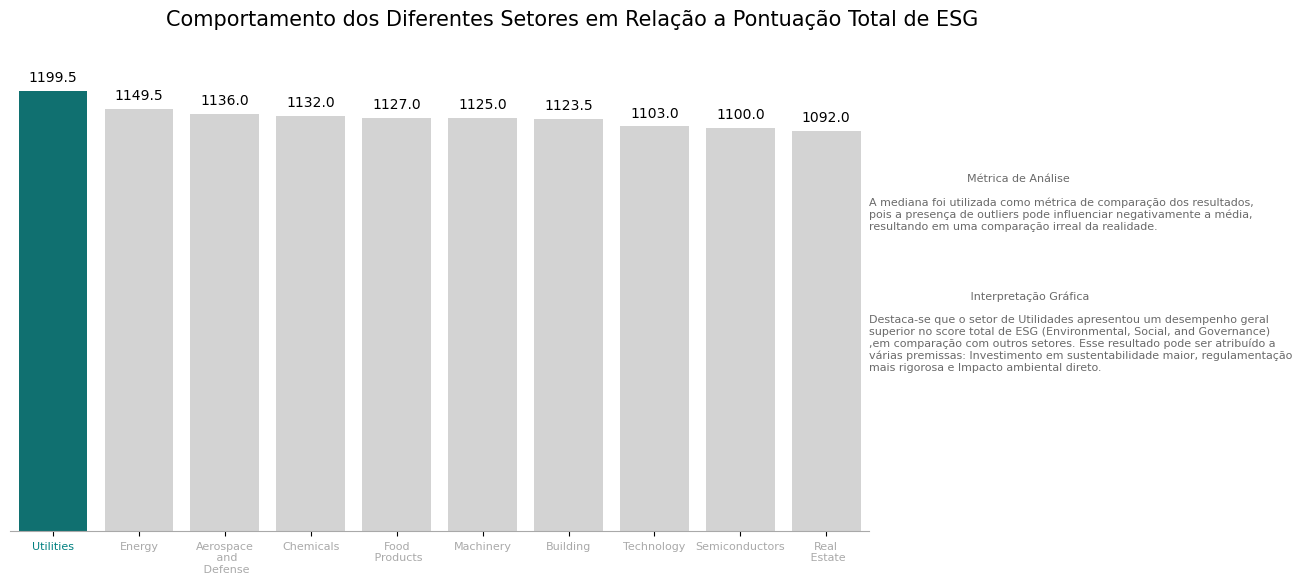

In [29]:
AnaliseCompartilhada().industry_highlight(df)

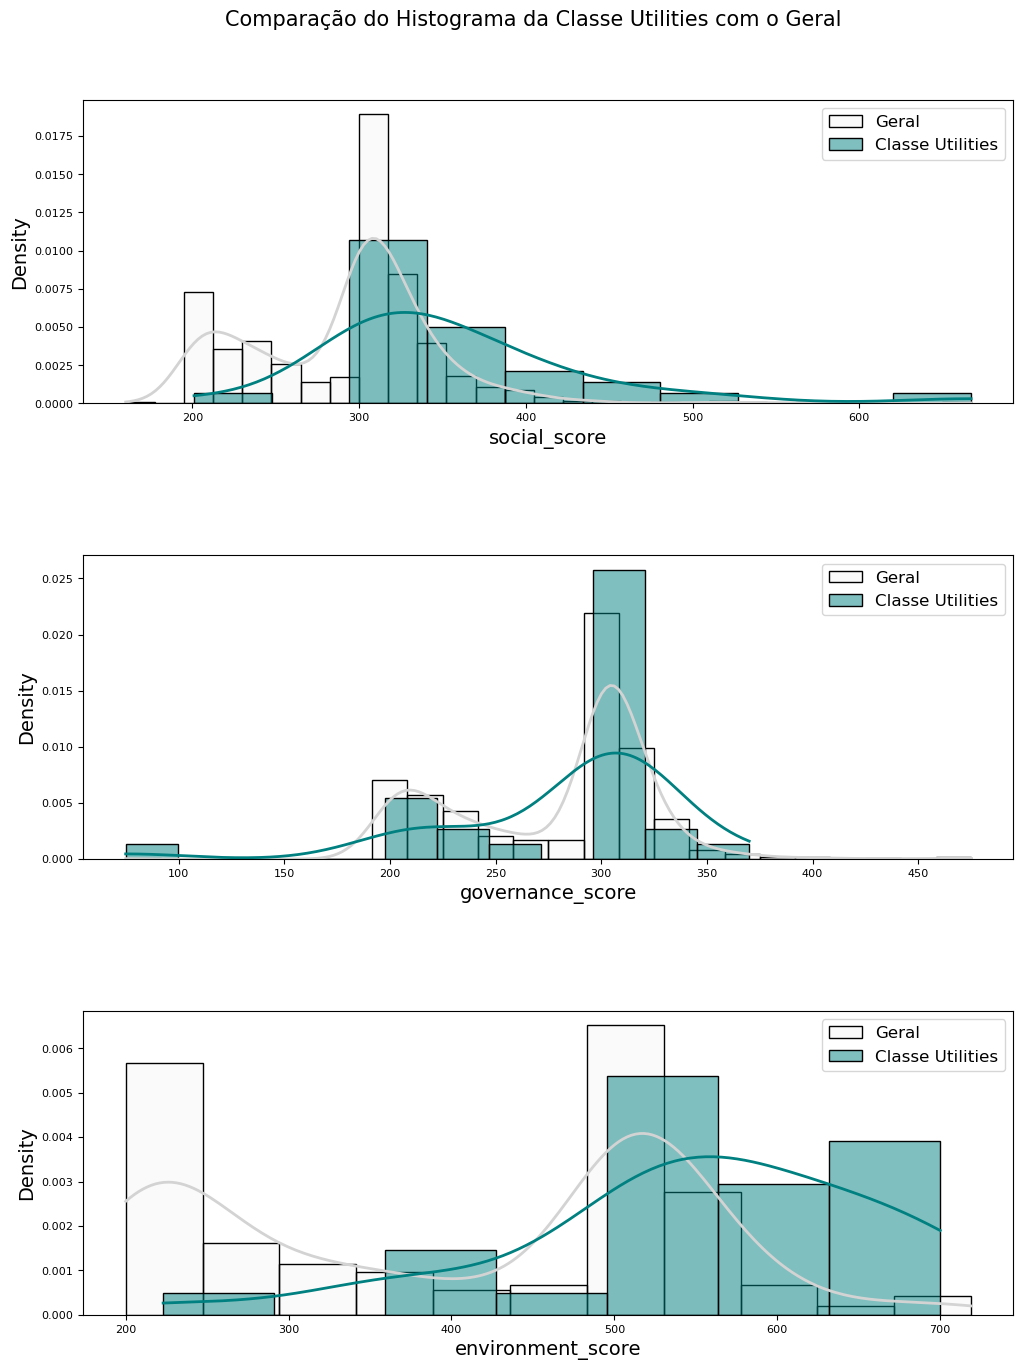

In [30]:
AnaliseCompartilhada().industry_dist(df)